# 12.10.2023

# Exercise: Analysing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin
from https://www.sports-reference.com/ and available on Moodle as “athlete_events.csv” .
Your Exercise is to identify the top five sports based on the largest number of medals awarded
in the year 2016, and then perform the following analysis:
1. Generate a plot indicating the number of medals awarded in each of the top five sports
in 2016.
2. Plot a graph depicting the distribution of the age of medal winners in the top five
sports in 2016.
3. Find out which national teams won the largest number of medals in the top five sports
in 2016.
4. Observe the trend in the average weight of male and female athletes winning in the
top five sports in 2016.

**High-Level Steps**

1. Download the dataset and format it as a pandas DataFrame.
2. Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3. Find out the medals awarded in 2016 for each sport.
4. List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5. Generate a bar plot of record counts corresponding to each of the top five sports.
6. Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7. Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8. Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

The expected output should be:

After Step 1:

In [1]:
# import pandas data set
import pandas as pd
import numpy as np # linear algebra
# Load the dataset into dataframe (df) 
df = pd.read_csv("athlete_events.csv")

# Display first 5 records
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Figure 1.32: Olympics dataset**

After Step 2:

In [2]:
#To get the desired output I will start dropping NaN values from column Medal:

df = df.dropna(subset=['Medal'])

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


**Figure 1.33: Filtered Olympics DataFrame**


After Step 3:

In [3]:
# Group the DataFrame by the 'Sport' column and count the medals for each sport.
medals_2016_by_sport = df[(df.Year==2016)]

medals_2016_by_sport.Sport.value_counts()

Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Basketball                72
Volleyball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Sailing                   45
Shooting                  45
Equestrianism             45
Weightlifting             45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Badminton                 24
Tennis                    24
Table Tennis              24
Archery                   24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: Sport, d

**Figure 1.34: The number of medals awarded**

After Step 4:

In [4]:
#Top 5 sports are Athletics, Swimming, Rowing, Football, and   Hockey.

# List of the top 5 sports
top_sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']

# Create a boolean mask to filter for the year 2016 and the top sports.
mask = (df['Year'] == 2016) & (df['Sport'].isin(top_sports))

# Apply the mask to your DataFrame to get the filtered results.
filtered_df_2016 = df[mask]

filtered_df_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


**Figure 1.35: Olympics DataFrame**

After Step 5:

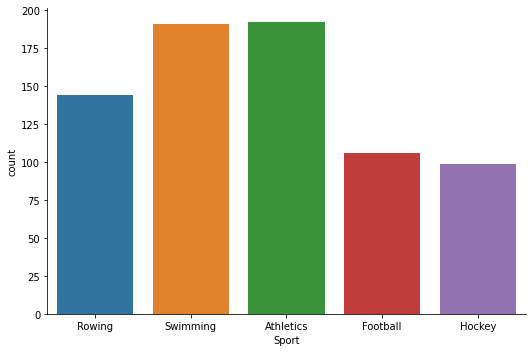

In [5]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

g = sns.catplot('Sport', data=filtered_df_2016, kind="count", aspect=1.5)

**Figure 1.36: Generated bar plot**

While most medal winners are between 20 and 30 years of age, there are also medal winners who are exceptionally younger (16 years) or older (40 years). 

After Step 6:

<AxesSubplot:xlabel='Age'>

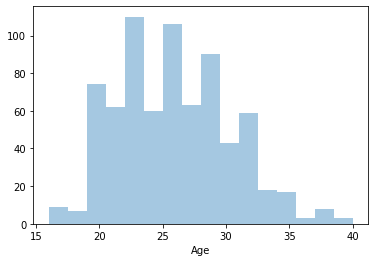

In [6]:
sns.distplot(filtered_df_2016.Age, kde=False)

**Figure 1.37: Histogram plot with the Age feature**

After Step 7:

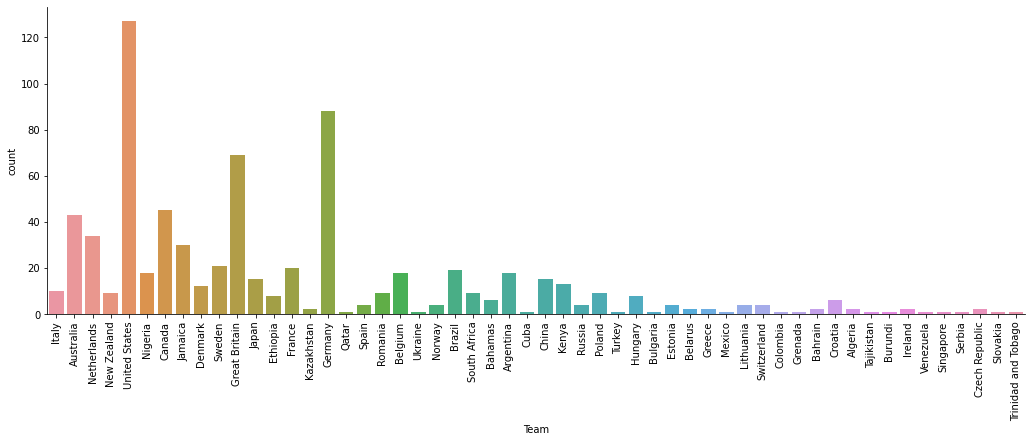

In [7]:
g = sns.catplot('Team', data=filtered_df_2016, kind="count", aspect=3)
g.set_xticklabels(rotation=90)

**Figure 1.38: Bar plot with the number of medals won**
Considering the five sports, the US won the most medals, followed by *Germany, Great Britain, Canada, and Australia.*

After Step 8:

<AxesSubplot:xlabel='Sport', ylabel='Weight'>

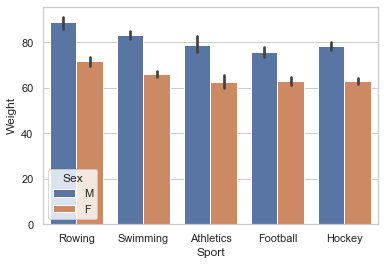

In [8]:
sns.set(style="whitegrid")

sns.barplot(x="Sport", y="Weight", data=filtered_df_2016, estimator=np.mean, hue='Sex')

**Figure 1.39: Bar plot with the average weight of players**

The bar plot indicates the highest athlete weight in rowing, followed by swimming, and then the other remaining sports.
The trend is similar across both male and female players.

